### Le cavalier piégé.
### Auteur: Charles T.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

### Fonction createBoard

In [2]:
def createBoard(size):
    board = np.ones((size, size), dtype=np.uint16)
    n     = 1

    for i in range(size):
        for j in range(i + 1):
            board[j][i - j] = n
            n += 1
    n = size * size
    for i in range(size - 1):
        for j in range(i + 1):
            board[size - 1 - j][size - i - 1 + j] = n
            n -= 1
    return board

In [3]:
board = createBoard(100)
np.savetxt('chessboard_100.txt', board, fmt='%3i')
print(board, '\n')

[[    1     2     4 ...  4754  4852  4951]
 [    3     5     8 ...  4853  4952  5051]
 [    6     9    13 ...  4953  5052  5150]
 ...
 [ 4851  4949  5048 ...  9988  9992  9995]
 [ 4950  5049  5148 ...  9993  9996  9998]
 [ 5050  5149  5247 ...  9997  9999 10000]] 



### Initialisation de l'échiquier

In [4]:
board = np.genfromtxt('chessboard_100.txt', dtype=np.uint16)
print(board, '\n')

[[    1     2     4 ...  4754  4852  4951]
 [    3     5     8 ...  4853  4952  5051]
 [    6     9    13 ...  4953  5052  5150]
 ...
 [ 4851  4949  5048 ...  9988  9992  9995]
 [ 4950  5049  5148 ...  9993  9996  9998]
 [ 5050  5149  5247 ...  9997  9999 10000]] 



### Fonction trappedKnight

In [5]:
def trappedKnight(board, steps):
    start = np.array([0, 0])
    coor  = np.array([0, 0])
    path  = []
    moves = np.array(([-2, -1], [-2, 1], [2, 1], [2, -1],
                      [-1, -2], [-1, 2], [1, 2], [1, -2]))

    path.append(1)
    for n in range(steps):
        valid_cases = start + moves
        mask_x      = (valid_cases > -1).all(axis=1)
        valid_cases = valid_cases[mask_x, :]
        mask_y      = (valid_cases < board.shape[0]).all(axis=1)
        valid_cases = valid_cases[mask_y, :]
        new_cases   = []
        for i in range(len(valid_cases)):
            case = board[valid_cases[i][0]][valid_cases[i][1]]
            if case not in path:
                new_cases.append(case)
        if len(new_cases) == 0:
            break
        case  = min(new_cases)
        start = np.argwhere(board == case)
        coor  = np.append(coor, start)
        path.append(case)
    return path, coor

### Calcul du chemin parcouru par le cavalier

In [6]:
path, coor = trappedKnight(board, 100)
print("Chemin du cavalier: ", path)

Chemin du cavalier:  [1, 8, 6, 2, 12, 9, 4, 3, 13, 7, 5, 10, 26, 18, 11, 30, 24, 16, 38, 31, 22, 17, 25, 20, 28, 34, 14, 21, 43, 33, 27, 19, 15, 35, 42, 32, 23, 29, 39, 47, 56, 69, 37, 48, 40, 51, 60, 70, 57, 67, 81, 46, 58, 49, 41, 52, 44, 55, 64, 36, 65, 53, 45, 76, 63, 54, 66, 103, 88, 74, 61, 71, 82, 68, 79, 94, 107, 121, 139, 92, 80, 95, 83, 72, 59, 50, 62, 75, 86, 98, 111, 125, 108, 122, 137, 156, 106, 93, 109, 96, 84]


### Affichage du chemin parcouru par le cavalier

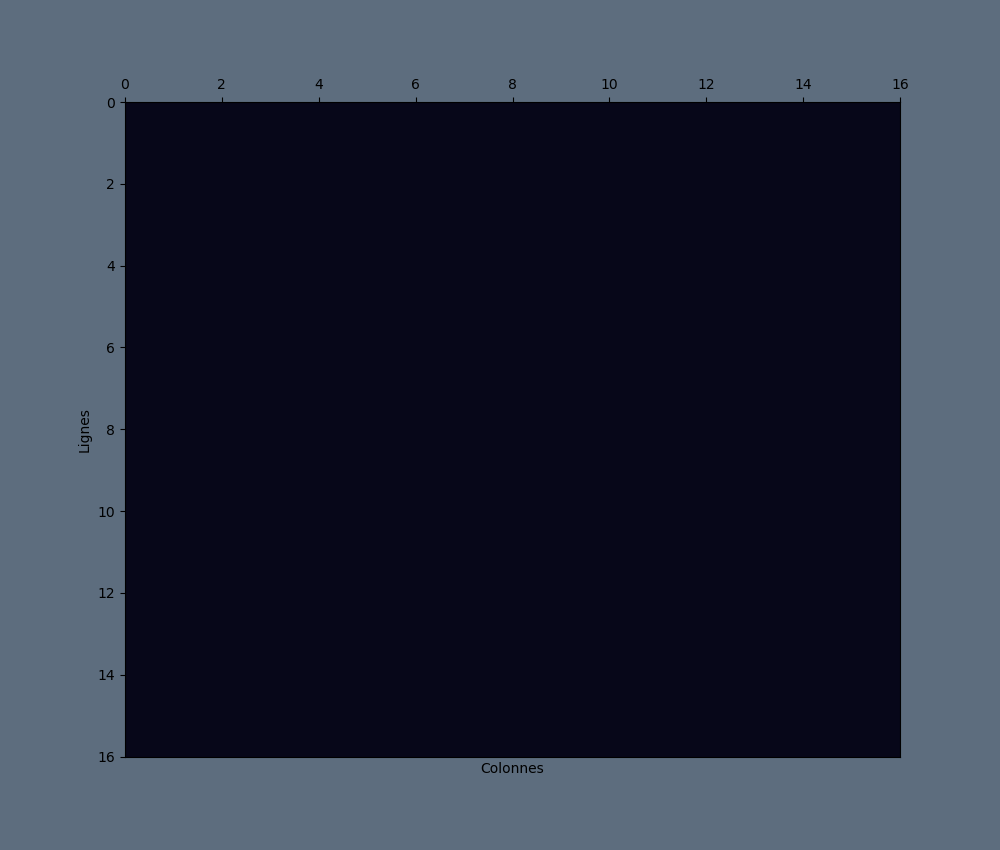

In [7]:
%matplotlib ipympl

px       = 1 / plt.rcParams['figure.dpi']
fig, axs = plt.subplots(figsize=(1000*px, 850*px), facecolor="#5D6D7E")


coor     = coor.reshape(-1, 2)
X        = coor[:, :1]
Y        = coor[:, 1:]
x_max    = np.max(X)
y_max    = np.max(Y)
ax_limit = max(x_max, y_max)

axs.set_xlim(0, ax_limit)
axs.set_ylim(0, ax_limit)

axs.set_ylim(axs.get_ylim()[::-1])
axs.xaxis.tick_top()  

axs.set_xlabel("Colonnes")
axs.set_ylabel("Lignes")
axs.set_facecolor("#070719")
axs.set_prop_cycle(color=['#FF8000', '#F2F2F2', '#00BFFF', '#00FF00'])

i    = 0
time = (1000 // (len(X) - 1)) * 10 + 6

def update(f):
    global i
    if i < len(coor) - 1:
        x_values = [X[i][0], X[i + 1][0]]
        y_values = [Y[i][0], Y[i + 1][0]]
        plt.plot(y_values, x_values, lw=1, linestyle='--')
        axs.scatter(y_values, x_values, s=100, c='white')
    else:
        axs.scatter(Y[len(coor) - 1][0], X[len(coor) - 1][0], s=400, c='red')
    i += 1
    
loop = animation.FuncAnimation(fig, update, frames=len(X), interval=time, blit=True, repeat=False)

plt.show()